# Analytics Lifecycle - Case Study

Exploratory Data Analysis - Fantasy Football

# 0.0 Problem Statement


# 0.1 Context

Fantasy football is a fun hobby to stay in touch with friends, family and coworkers. Fantasy football is a game of skill and a game of luck. All the analysis in the world won't help you if your first round pick gets hurt in week one. In a standard league there are usually only 10 to 12 teams. The goal of this exercise is to uncover stand out players that may be hidden in the list of names that we must select from. Finding players that are unknown or undervalued commodities is like buying Apple stock before anyone had an iPhone.

# 0.2 Objective

The objective of this exercise is to analyze players individual and amongst their positional cohorts to find outliers and potential outliers that may out perform their peers. Finding individual players that outperform their expected results allows to build a stronger team and a chance to advance to the playoffs and beyond.

# 0.3 Data Dictionary

# 0.4 Questions & Hypotheisis to answer?



1.   What qualities do high scoring WRs have?
2.   What qualities do high scoring RBs have?
3.   How important is it for a player to be on high scoring team?



# 1.0 Install Python libraries

# 1.1 Import Python libraries

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 2.0 Import data into Google Colab

In [3]:
#Pull latest projection from FPs

url = 'https://www.fantasypros.com/nfl/projections/flex.php?week=draft&scoring=PPR&week=draft'
tables = pd.read_html(url)

# pd.read_html returns a list of DataFrames, one for each table found on the page.
# You may need to inspect the list to find the correct table.
# For example, to display the first table:
df = tables[0]
#display(df.head())

# 3.0 Pre-processing

# 3.1. Rename headers

In [4]:
#rename headers
new_column_names = [
    'Player', 'POS', 'RUSHING_ATT', 'RUSHING_YDS', 'RUSHING_TDS',
    'RECEIVING_REC', 'RECEIVING_YDS', 'RECEIVING_TDS',
    'MISC_FL', 'FPTS'
]

df.columns = new_column_names
display(df.head())

,Player,POS,RUSHING_ATT,RUSHING_YDS,RUSHING_TDS,RECEIVING_REC,RECEIVING_YDS,RECEIVING_TDS,MISC_FL,FPTS
0,Ja'Marr Chase CIN,WR1,1.6,12.7,0.0,120.1,1580.9,12.2,0.6,351.8
1,Bijan Robinson ATL,RB1,304.8,1421.8,11.4,58.9,447.2,2.2,1.4,325.0
2,Saquon Barkley PHI,RB2,336.4,1683.6,11.1,43.2,331.1,2.2,1.4,321.5
3,Jahmyr Gibbs DET,RB3,240.2,1240.4,11.7,58.2,511.9,2.8,1.3,317.6
4,CeeDee Lamb DAL,WR2,9.1,58.8,0.3,112.1,1395.2,8.1,1.0,306.1


# 3.2 Extract the first 2 characters from 'POS' column to use for filtering

In [5]:
# Extract the first two characters of the 'POS' column for filtering
df['POS_prefix'] = df['POS'].str[:2]

rb = df[df['POS_prefix'] == 'RB']
qb = df[df['POS_prefix'] == 'QB']
wr = df[df['POS_prefix'] == 'WR']
te = df[df['POS_prefix'] == 'TE']

In [6]:
#Verify update by displaying table

display(rb.tail())
#display(qb.head())
#display(wr.head())
#display(te.head())

,Player,POS,RUSHING_ATT,RUSHING_YDS,RUSHING_TDS,RECEIVING_REC,RECEIVING_YDS,RECEIVING_TDS,MISC_FL,FPTS,POS_prefix
470,Kene Nwangwu NYJ,RB152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RB
471,Gary Brightwell CIN,RB153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RB
474,Deneric Prince NE,RB154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RB
475,Jonathon Brooks CAR,RB155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RB
476,British Brooks HOU,RB156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RB


# 4.0 Clean the data

# 4.1 Filter table for players projected for 50 or more points

In [7]:
#all players projected for 50+ fpts
high_fpts_df = df[df['FPTS'] >= 50]
display(high_fpts_df)

,Player,POS,RUSHING_ATT,RUSHING_YDS,RUSHING_TDS,RECEIVING_REC,RECEIVING_YDS,RECEIVING_TDS,MISC_FL,FPTS,POS_prefix
0,Ja'Marr Chase CIN,WR1,1.6,12.7,0.0,120.1,1580.9,12.2,0.6,351.8,WR
1,Bijan Robinson ATL,RB1,304.8,1421.8,11.4,58.9,447.2,2.2,1.4,325.0,RB
2,Saquon Barkley PHI,RB2,336.4,1683.6,11.1,43.2,331.1,2.2,1.4,321.5,RB
3,Jahmyr Gibbs DET,RB3,240.2,1240.4,11.7,58.2,511.9,2.8,1.3,317.6,RB
4,CeeDee Lamb DAL,WR2,9.1,58.8,0.3,112.1,1395.2,8.1,1.0,306.1,WR
...,...,...,...,...,...,...,...,...,...,...,...
234,Gunnar Helm TEN,TE46,0.0,0.0,0.0,23.0,225.8,1.2,0.4,52.0,TE
235,Devin Neal NO,RB77,53.6,247.8,1.7,8.3,61.6,0.4,0.1,51.6,RB
236,Jarquez Hunter LAR,RB78,61.6,250.9,2.0,7.1,61.3,0.4,0.7,51.5,RB
237,Chimere Dike TEN,WR114,2.1,8.9,0.0,18.8,222.8,1.5,0.0,50.9,WR


# 4.2 Drop columns not required for analysis

In [ ]:
high_fpts_df = high_fpts_df.drop(columns=['MISC_FL', 'POS'])


# 4.3 Rename POS_prefix column to POS

In [ ]:
high_fpts_df = high_fpts_df.rename(columns={'POS_prefix': 'POS'})
display(high_fpts_df)

,Player,RUSHING_ATT,RUSHING_YDS,RUSHING_TDS,RECEIVING_REC,RECEIVING_YDS,RECEIVING_TDS,FPTS,POS
0,Ja'Marr Chase CIN,1.6,12.7,0.0,120.7,1576.8,12.2,352.0,WR
1,Bijan Robinson ATL,304.1,1419.0,11.4,57.7,438.4,2.2,322.2,RB
2,Jahmyr Gibbs DET,239.9,1239.5,11.7,57.7,508.5,2.8,316.6,RB
3,Saquon Barkley PHI,327.7,1661.6,10.8,41.9,317.9,2.2,315.0,RB
4,Justin Jefferson MIN,0.5,2.2,0.0,106.4,1480.7,9.8,312.2,WR
...,...,...,...,...,...,...,...,...,...
242,Jaleel McLaughlin DEN,30.5,142.6,0.8,18.2,110.3,0.9,52.5,RB
243,Kenneth Gainwell PIT,58.5,210.7,1.4,12.5,88.5,0.4,52.3,RB
244,Jarquez Hunter LAR,57.1,244.7,1.9,8.5,68.7,0.4,52.3,RB
245,Demarcus Robinson SF,0.0,1.0,0.0,15.5,244.3,2.0,51.7,WR


# 5.0 Descriptive Analysis

5.1 Display the first and last 5 rows of the dataset

In [ ]:
high_fpts_df.head()

,Player,RUSHING_ATT,RUSHING_YDS,RUSHING_TDS,RECEIVING_REC,RECEIVING_YDS,RECEIVING_TDS,FPTS,POS
0,Ja'Marr Chase CIN,1.6,12.7,0.0,120.7,1576.8,12.2,352.0,WR
1,Bijan Robinson ATL,304.1,1419.0,11.4,57.7,438.4,2.2,322.2,RB
2,Jahmyr Gibbs DET,239.9,1239.5,11.7,57.7,508.5,2.8,316.6,RB
3,Saquon Barkley PHI,327.7,1661.6,10.8,41.9,317.9,2.2,315.0,RB
4,Justin Jefferson MIN,0.5,2.2,0.0,106.4,1480.7,9.8,312.2,WR


In [ ]:
high_fpts_df.tail()

,Player,RUSHING_ATT,RUSHING_YDS,RUSHING_TDS,RECEIVING_REC,RECEIVING_YDS,RECEIVING_TDS,FPTS,POS
242,Jaleel McLaughlin DEN,30.5,142.6,0.8,18.2,110.3,0.9,52.5,RB
243,Kenneth Gainwell PIT,58.5,210.7,1.4,12.5,88.5,0.4,52.3,RB
244,Jarquez Hunter LAR,57.1,244.7,1.9,8.5,68.7,0.4,52.3,RB
245,Demarcus Robinson SF,0.0,1.0,0.0,15.5,244.3,2.0,51.7,WR
246,Josh Oliver MIN,0.0,0.0,0.0,20.2,210.9,1.7,51.4,TE


# 5.2 Check the shape of the dataset

In [ ]:
print("There are", df.shape[0], "rows and", df.shape[1], "columns in the dataset.")

There are 574 rows and 11 columns in the dataset.


# 5.3 Check the data types of the columns in the dataset

In [ ]:
high_fpts_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 0 to 246
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         247 non-null    object 
 1   RUSHING_ATT    247 non-null    float64
 2   RUSHING_YDS    247 non-null    float64
 3   RUSHING_TDS    247 non-null    float64
 4   RECEIVING_REC  247 non-null    float64
 5   RECEIVING_YDS  247 non-null    float64
 6   RECEIVING_TDS  247 non-null    float64
 7   FPTS           247 non-null    float64
 8   POS            247 non-null    object 
dtypes: float64(7), object(2)
memory usage: 19.3+ KB


# 5.4 Check for missing values in the dataset

In [ ]:
#checking missing values uisng the isnull function
high_fpts_df.isnull().sum()

,0
Player,0
RUSHING_ATT,0
RUSHING_YDS,0
RUSHING_TDS,0
RECEIVING_REC,0
RECEIVING_YDS,0
RECEIVING_TDS,0
FPTS,0
POS,0


Observation: There are no missing values in the data

# 5.5 Check for duplicate entries

In [ ]:
high_fpts_df.duplicated().sum()

np.int64(0)

Observation: There are no duplicate values in the data

# 5.6 Check the statistical summary of the data

In [ ]:
#Transcribe the data ".T" to summarize
high_fpts_df.describe().T

,count,mean,std,min,25%,50%,75%,max
RUSHING_ATT,247.0,48.838057,82.200619,0.0,0.00,1.3,84.75,327.7
RUSHING_YDS,247.0,213.653441,364.131219,0.0,0.00,8.9,324.80,1661.6
RUSHING_TDS,247.0,1.581377,2.829443,0.0,0.00,0.0,2.45,13.3
RECEIVING_REC,247.0,44.818219,24.613336,6.1,25.55,39.1,59.15,120.7
RECEIVING_YDS,247.0,505.262753,335.930724,42.9,257.15,416.6,699.30,1576.8
RECEIVING_TDS,247.0,3.252227,2.292065,0.1,1.60,2.6,4.55,12.2
FPTS,247.0,144.436437,70.294168,51.4,86.10,128.2,194.30,352.0


The above table displays the descriptive analysis for numeric columns

**Observations:**

*   Up to 50% of players score NO touchdowns
*   75% of players had less than 60 receptions



# 5.7 Check the statistical summaries of the data by position (POS)

In [ ]:
high_fpts_df.groupby(['POS']).describe().T

POS                           RB           TE           WR
RUSHING_ATT   count    76.000000    47.000000   124.000000
              mean    155.165789     0.000000     2.180645
              std      74.747055     0.000000     3.939825
              min      30.500000     0.000000     0.000000
              25%      95.900000     0.000000     0.000000
              50%     141.450000     0.000000     0.700000
              75%     215.975000     0.000000     2.225000
              max     327.700000     0.000000    30.200000
RUSHING_YDS   count    76.000000    47.000000   124.000000
              mean    672.455263     0.574468    13.216129
              std     354.951628     1.958756    21.044414
              min     142.600000     0.000000     0.000000
              25%     400.350000     0.000000     1.150000
              50%     594.900000     0.000000     4.850000
              75%     957.725000     0.000000    13.825000
              max    1661.600000    10.500000   128.200000
RUSHING_TDS   count    76.000000    47.000000   124.000000
              mean      5.018421     0.000000     0.074194
              std       2.982916     0.000000     0.202774
              min       0.800000     0.000000     0.000000
              25%       2.875000     0.000000     0.000000
              50%       4.450000     0.000000     0.000000
              75%       6.550000     0.000000     0.100000
              max      13.300000     0.000000     1.300000
RECEIVING_REC count    76.000000    47.000000   124.000000
              mean     27.943421    49.804255    53.270968
              std      15.031481    19.887302    25.854800
              min       6.100000    20.200000    15.500000
              25%      15.700000    35.350000    29.700000
              50%      25.750000    49.900000    50.050000
              75%      37.675000    57.450000    73.900000
              max      68.900000   106.100000   120.700000
RECEIVING_YDS count    76.000000    47.000000   124.000000
              mean    211.034211   518.800000   680.465323
              std     117.631778   217.915759   339.110444
              min      42.900000   210.900000   206.000000
              25%     119.900000   351.950000   380.950000
              50%     182.100000   508.800000   614.200000
              75%     278.325000   627.800000   950.150000
              max     563.900000  1129.500000  1576.800000
RECEIVING_TDS count    76.000000    47.000000   124.000000
              mean      1.159211     3.574468     4.412903
              std       0.730694     1.551362     2.275281
              min       0.100000     1.200000     1.400000
              25%       0.700000     2.400000     2.300000
              50%       1.000000     3.300000     3.900000
              75%       1.500000     4.350000     6.000000
              max       3.900000     7.700000    12.200000
FPTS          count    76.000000    47.000000   124.000000
              mean    151.278947   122.289362   148.637097
              std      75.475627    49.298444    72.567023
              min      52.300000    51.400000    51.700000
              25%      89.225000    84.650000    83.025000
              50%     137.800000   120.700000   137.300000
              75%     206.900000   145.300000   202.375000
              max     322.200000   255.500000   352.000000

**Observations:**

We will focus on Running backs (RB) and Wide Receivers (WR) as they score the majority of fantasy points for your team in a season.

There are 76 RBs and 124 WRs projected to score more than 50 points.

**RBs**

*   On average RBs have 157 rushing attempts
*   On average RBs score 5 touchdowns
*   On average RBs have 28 receptions

**WRs**

*   On average WRs have 53 receptions
*   On average WRs score 4 touchdowns
*   On average WRs have 682 receiving yards

We are looking for exceptional and above average players.






# 6.0 Univariate Analysis

In [ ]:
df_temp = high_fpts_df.groupby(['POS'])[['RUSHING_ATT', 'RUSHING_YDS', 'RUSHING_TDS',
                                         'RECEIVING_REC', 'RECEIVING_YDS', 'RECEIVING_TDS',
                                         'FPTS']].mean().reset_index()


In [ ]:
#display table rounding by 2
display(df_temp.round(2))

,POS,RUSHING_ATT,RUSHING_YDS,RUSHING_TDS,RECEIVING_REC,RECEIVING_YDS,RECEIVING_TDS,FPTS
0,RB,155.17,672.46,5.02,27.94,211.03,1.16,151.28
1,TE,0.00,0.57,0.00,49.80,518.80,3.57,122.29
2,WR,2.18,13.22,0.07,53.27,680.47,4.41,148.64


# 6.1 Analysis on Fantasy Points

<Axes: xlabel='FPTS', ylabel='Count'>

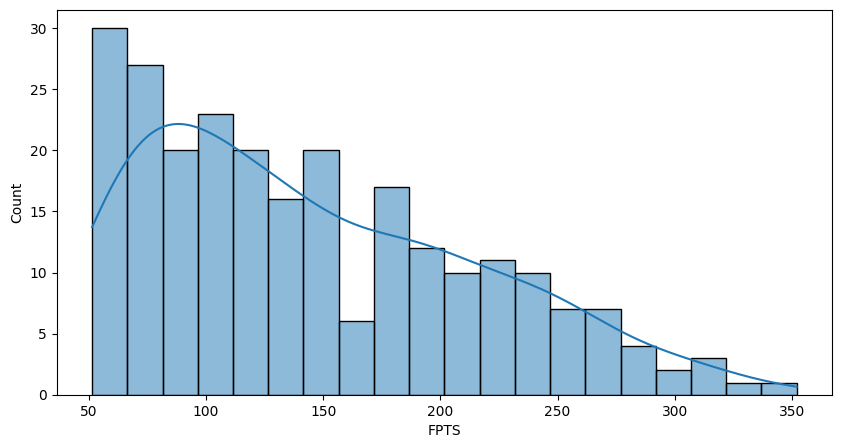

In [ ]:
#check the distribution on fantasy points
plt.figure(figsize=(10, 5))
sns.histplot(high_fpts_df['FPTS'], bins=20, kde=True)

In [ ]:
#check the distribution on fantasy points by position
rb = high_fpts_df[high_fpts_df['POS'] == 'RB']
wr = high_fpts_df[high_fpts_df['POS'] == 'WR']
te = high_fpts_df[high_fpts_df['POS'] == 'TE']

<Axes: xlabel='FPTS', ylabel='Count'>

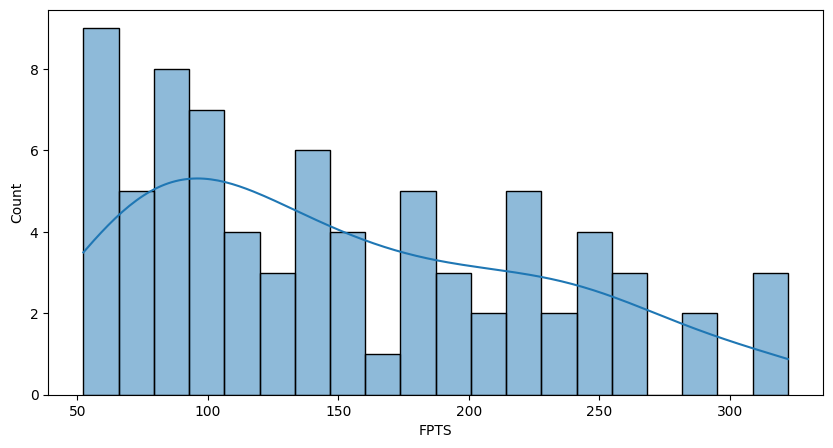

In [ ]:
#check the distribution on fantasy points for Running Backs
plt.figure(figsize=(10, 5))
sns.histplot(rb['FPTS'], bins=20, kde=True)

**Observations:**

*   There are 3 rbs in a league of their own
*   There are 2 rbs that are close to the top tier
*   There is a pocket of rbs in the next tier that projected to score the same


<Axes: xlabel='FPTS', ylabel='Count'>

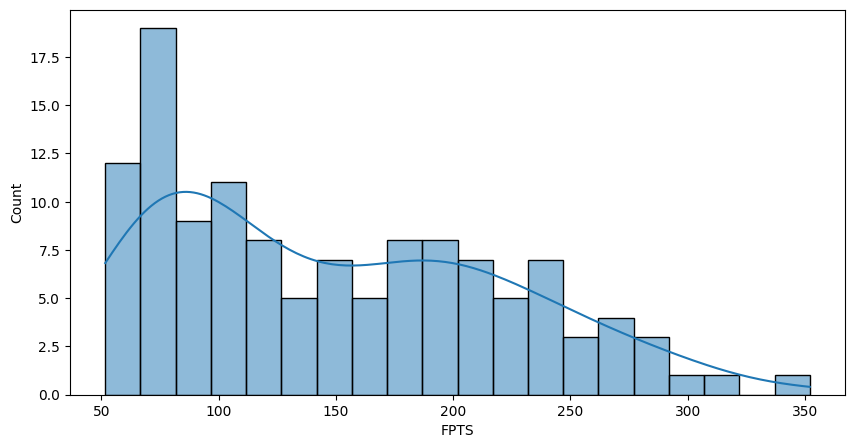

In [ ]:
#check the distribution on fantasy points for Wide Receivers
plt.figure(figsize=(10, 5))
sns.histplot(wr['FPTS'], bins=20, kde=True)

**Observations:**

*   There is 1 wr in a league of his own
*   There are 2 wrs that are close to the top tier
*   There a gradual increase in the number of available wrs in the following tiers


/tmp/ipython-input-1317096202.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_gp = high_fpts_df.groupby(['POS', pd.cut(high_fpts_df['FPTS'], bins=bins)])['FPTS'].count().reset_index(name='COUNT')


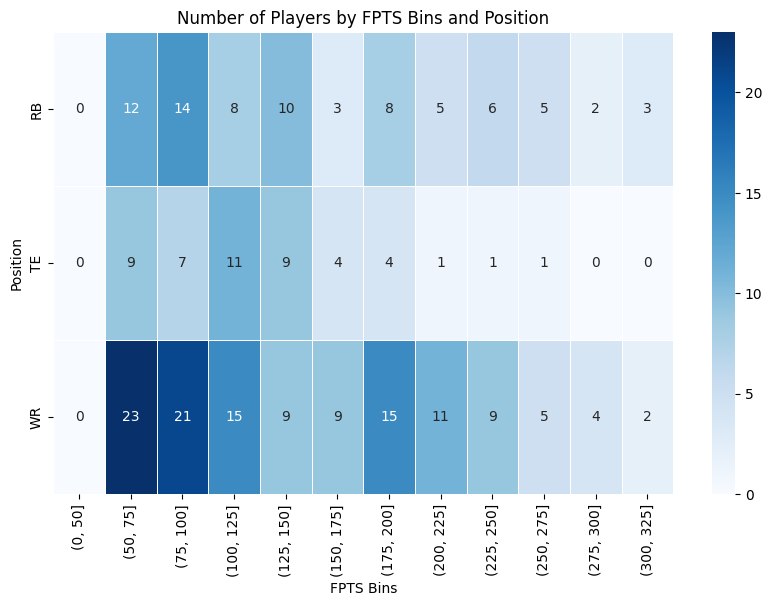

In [ ]:
# Heatmap for FPTS by Position
#heat map for rb fantasy point
# Pivot the data to get POS on one axis and FPTS_BINS on the other
#bins = [0, 50, 100, 150, 200, 250, 300, 350]
bins = [0, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325]
temp_gp = high_fpts_df.groupby(['POS', pd.cut(high_fpts_df['FPTS'], bins=bins)])['FPTS'].count().reset_index(name='COUNT')

# Rename the column containing the bins
temp_gp.columns = ['POS', 'FPTS_BINS', 'COUNT']

heatmap_data = temp_gp.pivot(index='POS', columns='FPTS_BINS', values='COUNT').fillna(0)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='Blues', linewidths=.5)
plt.title('Number of Players by FPTS Bins and Position')
plt.xlabel('FPTS Bins')
plt.ylabel('Position')
plt.show()

In [ ]:
#Add bins to the dataframe to see which bucket each player fits
bins = [0, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375]
high_fpts_df['FPTS_bin'] = pd.cut(high_fpts_df['FPTS'], bins=bins)
display(high_fpts_df.sort_values(by='FPTS_bin', ascending=False))

,Player,RUSHING_ATT,RUSHING_YDS,RUSHING_TDS,RECEIVING_REC,RECEIVING_YDS,RECEIVING_TDS,FPTS,POS,FPTS_bin
0,Ja'Marr Chase CIN,1.6,12.7,0.0,120.7,1576.8,12.2,352.0,WR,"(350, 375]"
2,Jahmyr Gibbs DET,239.9,1239.5,11.7,57.7,508.5,2.8,316.6,RB,"(300, 325]"
3,Saquon Barkley PHI,327.7,1661.6,10.8,41.9,317.9,2.2,315.0,RB,"(300, 325]"
4,Justin Jefferson MIN,0.5,2.2,0.0,106.4,1480.7,9.8,312.2,WR,"(300, 325]"
5,CeeDee Lamb DAL,9.2,59.3,0.3,110.9,1385.2,8.0,302.9,WR,"(300, 325]"
...,...,...,...,...,...,...,...,...,...,...
219,Van Jefferson TEN,0.0,0.0,0.0,23.5,300.5,1.9,64.5,WR,"(50, 75]"
220,Roman Wilson PIT,0.0,0.0,0.0,22.9,290.2,2.0,63.6,WR,"(50, 75]"
221,Jalen McMillan TB,0.6,4.9,0.0,22.6,276.2,2.3,63.3,WR,"(50, 75]"
222,Keaton Mitchell BAL,75.2,330.0,1.7,8.6,83.3,0.5,62.8,RB,"(50, 75]"


**Observations:**

*   There are slightly fewer rbs that will score more than 250 points
*   There are a lot more wrs available that will score more than 200 points

It may be better to secure one of the scarce high end rbs (9) vs wrs (11) as there will be more high scoring wrs from the second tier than rbs in the first few picks. Explore securing multiple high end rbs or one high end rb and one wr.

Examples:
If you are pick 10 and all the high end rbs are taken, it may be prudent to take the wr instead.



# 6.2 Analysis on Receptions

Many leagues are half point (.5) per reception or (1) point per reception. Players that catch passes are more valuable in these leagues. The following are the analysis of receptions.

<Axes: xlabel='RECEIVING_REC', ylabel='Count'>

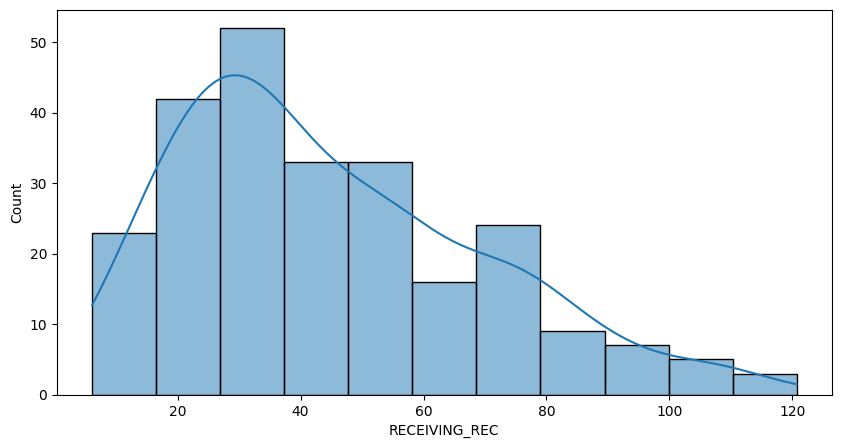

In [ ]:
#check the distribution on receptions
plt.figure(figsize=(10, 5))
sns.histplot(high_fpts_df['RECEIVING_REC'], kde=True)

**Observations:**


*   More than 100 catches is rare, getting one of these players is an advantage


/tmp/ipython-input-3698794206.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_rec_gp = high_fpts_df.groupby(['POS', pd.cut(high_fpts_df['RECEIVING_REC'], bins=bins)])['RECEIVING_REC'].count().reset_index(name='COUNT')


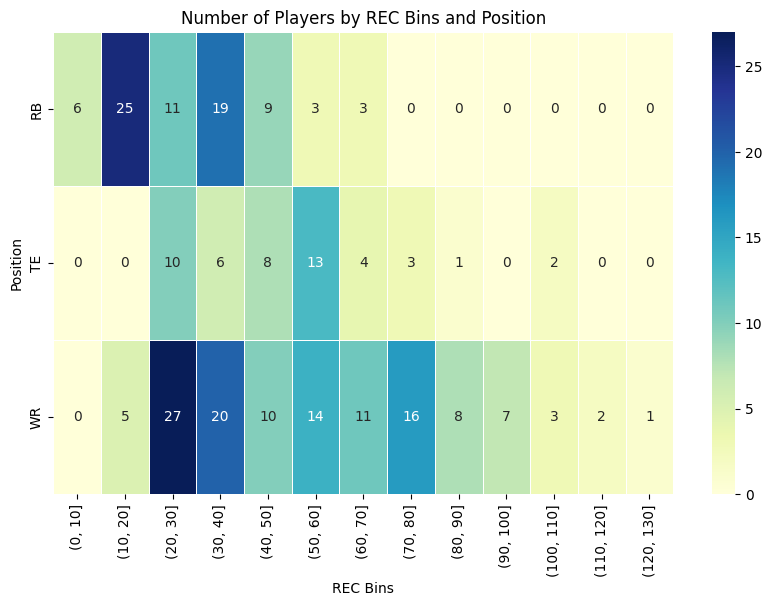

In [ ]:
# Heatmap for RECs by Position

# Group by POS and create bins for RECEIVING_REC
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]
temp_rec_gp = high_fpts_df.groupby(['POS', pd.cut(high_fpts_df['RECEIVING_REC'], bins=bins)])['RECEIVING_REC'].count().reset_index(name='COUNT')

# Rename the bins column for clarity
temp_rec_gp = temp_rec_gp.rename(columns={'RECEIVING_REC': 'REC_BINS'})

# Pivot the data to get POS on one axis and REC_BINS on the other
heatmap_data = temp_rec_gp.pivot(index='POS', columns='REC_BINS', values='COUNT').fillna(0)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='YlGnBu', linewidths=.5)
plt.title('Number of Players by REC Bins and Position')
plt.xlabel('REC Bins')
plt.ylabel('Position')
plt.show()

/tmp/ipython-input-51848221.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_rec_gp = high_fpts_df.groupby(['POS', pd.cut(high_fpts_df['RECEIVING_REC'], bins)])['RECEIVING_REC'].count().reset_index(name='COUNT')


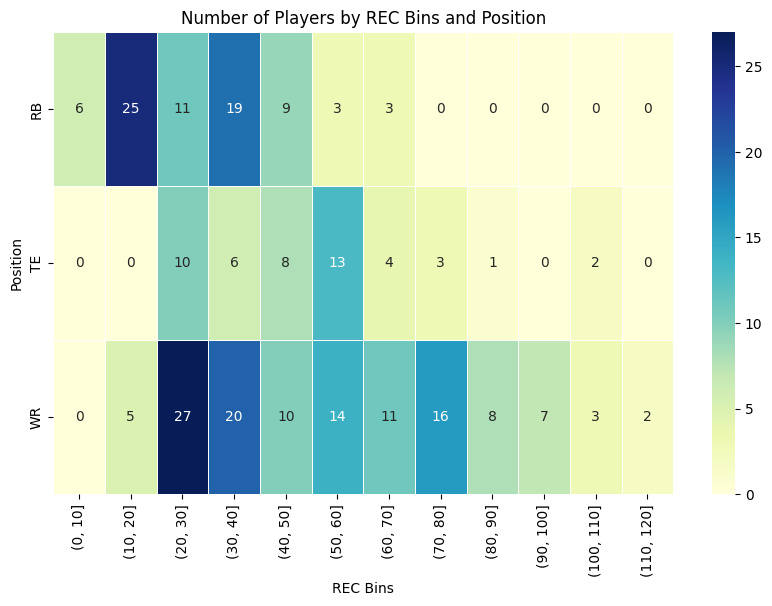

In [ ]:
# Heatmap for RECs by Position

# Group by POS and create bins for RECEIVING_REC
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
temp_rec_gp = high_fpts_df.groupby(['POS', pd.cut(high_fpts_df['RECEIVING_REC'], bins)])['RECEIVING_REC'].count().reset_index(name='COUNT')

# The column containing the bins is the second level of the MultiIndex after reset_index
temp_rec_gp.columns = ['POS', 'REC_BINS', 'COUNT']

# Pivot the data to get POS on one axis and REC_BINS on the other
heatmap_data = temp_rec_gp.pivot(index='POS', columns='REC_BINS', values='COUNT').fillna(0)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='YlGnBu', linewidths=.5)
plt.title('Number of Players by REC Bins and Position')
plt.xlabel('REC Bins')
plt.ylabel('Position')
plt.show()

**Observations:**
*   Only 6 rbs projected to catch more than 50 passes
*   Only 5 wrs projected to catch more than 100 passes
*   2 wrs are projected to catch more than 110 passes!







# 6.3 Analysis of Touchdowns

In [ ]:
#Create total touchdown column to account for rushing and receiving touchdowns
high_fpts_df['TOT_TDS'] = high_fpts_df['RUSHING_TDS'] + high_fpts_df['RECEIVING_TDS']


<Axes: xlabel='TOT_TDS', ylabel='Count'>

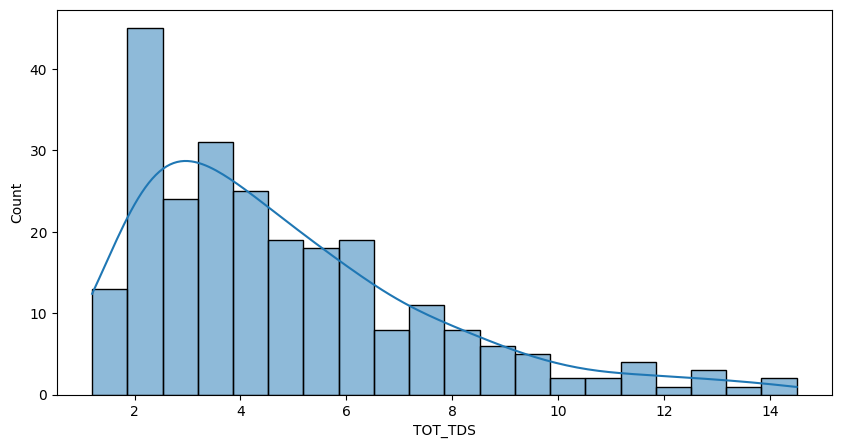

In [ ]:
#check the distribution on touchdowns
plt.figure(figsize=(10, 5))
sns.histplot(high_fpts_df['TOT_TDS'],bins=20, kde=True)

/tmp/ipython-input-2004385788.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_rec_gp = high_fpts_df.groupby(['POS', pd.cut(high_fpts_df['TOT_TDS'], bins)])['TOT_TDS'].count().reset_index(name='COUNT')


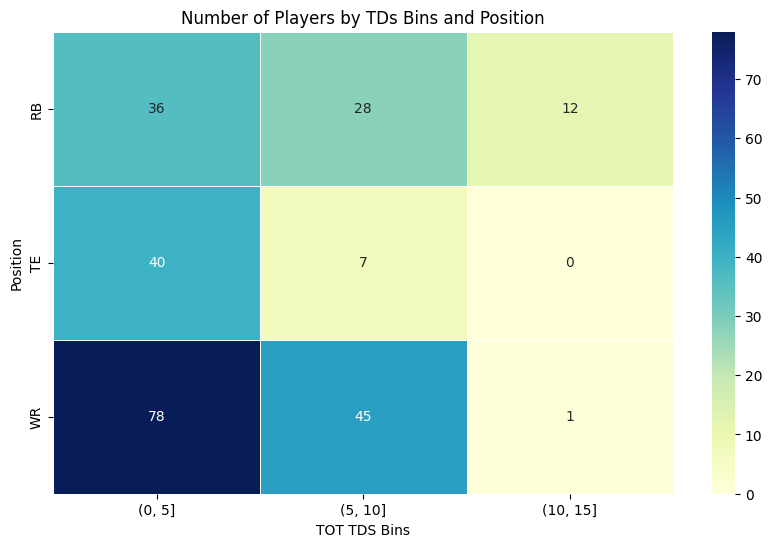

In [ ]:
# Heatmap for TDs by Position

# Group by POS and create bins for Total Touchdowns
bins = [0, 5, 10, 15]
temp_rec_gp = high_fpts_df.groupby(['POS', pd.cut(high_fpts_df['TOT_TDS'], bins)])['TOT_TDS'].count().reset_index(name='COUNT')

# The column containing the bins is the second level of the MultiIndex after reset_index
temp_rec_gp.columns = ['POS', 'TOT_TDS_BINS', 'COUNT']

# Pivot the data to get POS on one axis and TOT_TDS_BINS on the other
heatmap_data = temp_rec_gp.pivot(index='POS', columns='TOT_TDS_BINS', values='COUNT').fillna(0)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='YlGnBu', linewidths=.5)
plt.title('Number of Players by TDs Bins and Position')
plt.xlabel('TOT TDS Bins')
plt.ylabel('Position')
plt.show()

6.4 Top Player Analysis

Find the top players in each of the selected stats.

In [ ]:
from IPython.display import display, Markdown

def get_top_players_df(df, column, n=10):
  """
  Sorts the DataFrame by a given column in descending order and returns the top n players DataFrame.

  Args:
    df: The input pandas DataFrame.
    column: The column name to sort by.
    n: The number of top players to return (default is 10).

  Returns:
    A pandas DataFrame containing the top n players for the specified column.
  """
  top_players = df.sort_values(by=column, ascending=False)
  return top_players[['Player', column]].head(n)

# Get top players for each category
fpts_top_players = get_top_players_df(high_fpts_df, 'FPTS', 10)
recs_top_players = get_top_players_df(high_fpts_df, 'RECEIVING_REC', 10)
rb_recs_top_players = get_top_players_df(rb, 'RECEIVING_REC', 10)
wr_recs_top_players = get_top_players_df(wr, 'RECEIVING_REC', 10)
tds_top_players = get_top_players_df(high_fpts_df, 'TOT_TDS', 10)

# Display the top players for each category with markdown headings
display(Markdown("### Top 10 Players by FPTS"))
display(fpts_top_players)

display(Markdown("### Top 10 Players by Receptions (All Positions)"))
display(recs_top_players)

display(Markdown("### Top 10 Running Backs by Receptions"))
display(rb_recs_top_players)

display(Markdown("### Top 10 Wide Receivers by Receptions"))
display(wr_recs_top_players)

display(Markdown("### Top 10 Players by Total Touchdowns"))
display(tds_top_players)

### Top 10 Players by FPTS

,Player,FPTS
0,Ja'Marr Chase CIN,352.0
1,Bijan Robinson ATL,322.2
2,Jahmyr Gibbs DET,316.6
3,Saquon Barkley PHI,315.0
4,Justin Jefferson MIN,312.2
5,CeeDee Lamb DAL,302.9
6,Christian McCaffrey SF,294.6
7,Puka Nacua LAR,291.2
8,Malik Nabers NYG,290.9
9,Amon-Ra St. Brown DET,289.7


### Top 10 Players by Receptions (All Positions)

,Player,RECEIVING_REC
0,Ja'Marr Chase CIN,120.7
5,CeeDee Lamb DAL,110.9
9,Amon-Ra St. Brown DET,110.4
8,Malik Nabers NYG,107.0
4,Justin Jefferson MIN,106.4
19,Brock Bowers LV,106.1
7,Puka Nacua LAR,104.9
28,Trey McBride ARI,104.4
13,Drake London ATL,95.9
17,Tyreek Hill MIA,94.2


### Top 10 Running Backs by Receptions

,Player,RECEIVING_REC
10,De'Von Achane MIA,68.9
6,Christian McCaffrey SF,64.9
31,Alvin Kamara NO,63.0
2,Jahmyr Gibbs DET,57.7
1,Bijan Robinson ATL,57.7
22,Chase Brown CIN,54.6
80,Jaylen Warren PIT,47.5
38,Breece Hall NYJ,46.9
16,Ashton Jeanty LV,45.9
54,Aaron Jones Sr. MIN,44.8


### Top 10 Wide Receivers by Receptions

,Player,RECEIVING_REC
0,Ja'Marr Chase CIN,120.7
5,CeeDee Lamb DAL,110.9
9,Amon-Ra St. Brown DET,110.4
8,Malik Nabers NYG,107.0
4,Justin Jefferson MIN,106.4
7,Puka Nacua LAR,104.9
13,Drake London ATL,95.9
17,Tyreek Hill MIA,94.2
26,Jaxon Smith-Njigba SEA,93.7
11,Nico Collins HOU,91.9


### Top 10 Players by Total Touchdowns

,Player,TOT_TDS
2,Jahmyr Gibbs DET,14.5
14,Derrick Henry BAL,14.2
1,Bijan Robinson ATL,13.6
3,Saquon Barkley PHI,13.0
25,Kyren Williams LAR,12.9
15,Josh Jacobs GB,12.8
0,Ja'Marr Chase CIN,12.2
20,Jonathan Taylor IND,11.7
10,De'Von Achane MIA,11.5
35,James Cook BUF,11.5


# 6.4 Insights and Recommendations

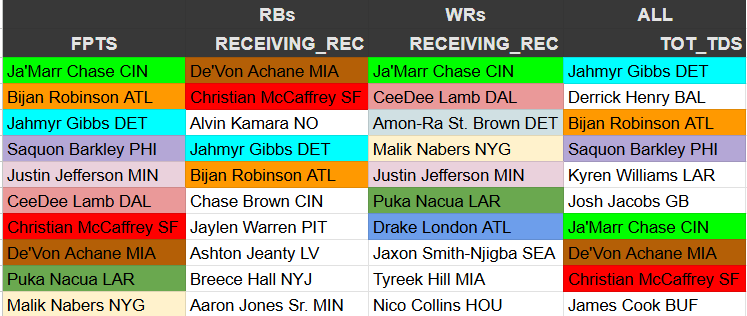

**Observations:**

*   Ja'Marr Chase & Bijan Robinson are highly ranked in multiple categories.
*   Ja'Marr Chase is an outlier in fantasy points and receptions. He is also   the sole receiver on the top 10 list for touchdowns!
*   Gibbs is highly ranked in multiple categories and should be a prime target.
*   Saquon is highly ranked despite not having the receiving volume.
*   De'Von Achane is a prime target.
*   Given his high ranks, Chrisitian McCaffrey is a risk worth taking.





In [8]:
high_fpts_df

,Player,POS,RUSHING_ATT,RUSHING_YDS,RUSHING_TDS,RECEIVING_REC,RECEIVING_YDS,RECEIVING_TDS,MISC_FL,FPTS,POS_prefix
0,Ja'Marr Chase CIN,WR1,1.6,12.7,0.0,120.1,1580.9,12.2,0.6,351.8,WR
1,Bijan Robinson ATL,RB1,304.8,1421.8,11.4,58.9,447.2,2.2,1.4,325.0,RB
2,Saquon Barkley PHI,RB2,336.4,1683.6,11.1,43.2,331.1,2.2,1.4,321.5,RB
3,Jahmyr Gibbs DET,RB3,240.2,1240.4,11.7,58.2,511.9,2.8,1.3,317.6,RB
4,CeeDee Lamb DAL,WR2,9.1,58.8,0.3,112.1,1395.2,8.1,1.0,306.1,WR
...,...,...,...,...,...,...,...,...,...,...,...
234,Gunnar Helm TEN,TE46,0.0,0.0,0.0,23.0,225.8,1.2,0.4,52.0,TE
235,Devin Neal NO,RB77,53.6,247.8,1.7,8.3,61.6,0.4,0.1,51.6,RB
236,Jarquez Hunter LAR,RB78,61.6,250.9,2.0,7.1,61.3,0.4,0.7,51.5,RB
237,Chimere Dike TEN,WR114,2.1,8.9,0.0,18.8,222.8,1.5,0.0,50.9,WR


In [11]:
# Total touchdowns (if not already computed)
high_fpts_df['TOT_TDS'] = high_fpts_df['RUSHING_TDS'] + high_fpts_df['RECEIVING_TDS']

# Fantasy Points bins (for tier analysis)
bins_fpts = [50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375]
labels_fpts = ['50-74', '75-99', '100-124', '125-149', '150-174', '175-199',
               '200-224', '225-249', '250-274', '275-299', '300-324', '325-349', '350+']
high_fpts_df['FPTS_BIN'] = pd.cut(high_fpts_df['FPTS'], bins=bins_fpts, labels=labels_fpts, include_lowest=True)

# Reception bins (for PPR advantage visualization)
bins_rec = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]
labels_rec = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69',
              '70-79', '80-89', '90-99', '100-109', '110-119', '120+']
high_fpts_df['RECEIVING_REC_BIN'] = pd.cut(high_fpts_df['RECEIVING_REC'], bins=bins_rec, labels=labels_rec, include_lowest=True)

# Touchdown bins (for scoring concentration)
bins_tds = [0, 5, 10, 15, 20]
labels_tds = ['0-4', '5-9', '10-14', '15+']
high_fpts_df['TOT_TDS_BIN'] = pd.cut(high_fpts_df['TOT_TDS'], bins=bins_tds, labels=labels_tds, include_lowest=True)


/tmp/ipython-input-3142896015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_fpts_df['TOT_TDS'] = high_fpts_df['RUSHING_TDS'] + high_fpts_df['RECEIVING_TDS']
/tmp/ipython-input-3142896015.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_fpts_df['FPTS_BIN'] = pd.cut(high_fpts_df['FPTS'], bins=bins_fpts, labels=labels_fpts, include_lowest=True)
/tmp/ipython-input-3142896015.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [12]:
high_fpts_df

,Player,POS,RUSHING_ATT,RUSHING_YDS,RUSHING_TDS,RECEIVING_REC,RECEIVING_YDS,RECEIVING_TDS,MISC_FL,FPTS,POS_prefix,TOT_TDS,FPTS_BIN,RECEIVING_REC_BIN,TOT_TDS_BIN
0,Ja'Marr Chase CIN,WR1,1.6,12.7,0.0,120.1,1580.9,12.2,0.6,351.8,WR,12.2,350+,120+,10-14
1,Bijan Robinson ATL,RB1,304.8,1421.8,11.4,58.9,447.2,2.2,1.4,325.0,RB,13.6,300-324,50-59,10-14
2,Saquon Barkley PHI,RB2,336.4,1683.6,11.1,43.2,331.1,2.2,1.4,321.5,RB,13.3,300-324,40-49,10-14
3,Jahmyr Gibbs DET,RB3,240.2,1240.4,11.7,58.2,511.9,2.8,1.3,317.6,RB,14.5,300-324,50-59,10-14
4,CeeDee Lamb DAL,WR2,9.1,58.8,0.3,112.1,1395.2,8.1,1.0,306.1,WR,8.4,300-324,110-119,5-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,Gunnar Helm TEN,TE46,0.0,0.0,0.0,23.0,225.8,1.2,0.4,52.0,TE,1.2,50-74,20-29,0-4
235,Devin Neal NO,RB77,53.6,247.8,1.7,8.3,61.6,0.4,0.1,51.6,RB,2.1,50-74,0-9,0-4
236,Jarquez Hunter LAR,RB78,61.6,250.9,2.0,7.1,61.3,0.4,0.7,51.5,RB,2.4,50-74,0-9,0-4
237,Chimere Dike TEN,WR114,2.1,8.9,0.0,18.8,222.8,1.5,0.0,50.9,WR,1.5,50-74,10-19,0-4


In [14]:
#export file
cols_to_export = [
    'Player', 'POS_prefix', 'RUSHING_ATT', 'RUSHING_YDS', 'RUSHING_TDS',
    'RECEIVING_REC', 'RECEIVING_YDS', 'RECEIVING_TDS',
    'TOT_TDS', 'FPTS',
    'FPTS_BIN', 'RECEIVING_REC_BIN', 'TOT_TDS_BIN'
]

high_fpts_df[cols_to_export].to_csv('fantasy_tableau_ready.csv', index=False)
